In [1]:
import numpy as np
import pandas as pd
from pyspark.sql import SparkSession
import sklearn

# 1. Analyze the data

In [2]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('ml-bank').getOrCreate()
df = spark.read.csv('iris.csv', header = True, inferSchema = True)
df.printSchema()

root
 |-- sepal_length: double (nullable = true)
 |-- sepal_width: double (nullable = true)
 |-- petal_length: double (nullable = true)
 |-- petal_width: double (nullable = true)
 |-- variety: string (nullable = true)



In [3]:
pd.DataFrame(df.take(5), columns=df.columns)

,sepal_length,sepal_width,petal_length,petal_width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [4]:
df.columns

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'variety']

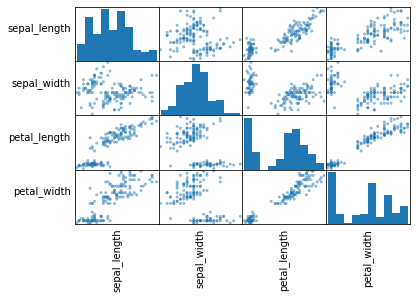

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
numeric_data = df.select(['sepal_length', 'sepal_width', 'petal_length', 'petal_width']).toPandas()
axs = pd.plotting.scatter_matrix(numeric_data);
n = len(numeric_data.columns)
for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())

# 2. Prepare data for classification

In [7]:
from pyspark.ml.feature import OneHotEncoderEstimator, StringIndexer, VectorAssembler
feat_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
assembler = VectorAssembler(inputCols=feat_cols,
                            outputCol="features")

stages = []
stages.append(assembler)
label_stringIdx = StringIndexer(inputCol = 'variety', outputCol = 'label')
stages.append(label_stringIdx)
encoder = OneHotEncoderEstimator(dropLast=False, inputCols=[label_stringIdx.getOutputCol()], outputCols=["classVec"])
stages.append(encoder)

In [8]:
from pyspark.ml import Pipeline
pipeline = Pipeline(stages = stages)
pipelineModel = pipeline.fit(df)
df = pipelineModel.transform(df)
df.printSchema()

root
 |-- sepal_length: double (nullable = true)
 |-- sepal_width: double (nullable = true)
 |-- petal_length: double (nullable = true)
 |-- petal_width: double (nullable = true)
 |-- variety: string (nullable = true)
 |-- features: vector (nullable = true)
 |-- label: double (nullable = false)
 |-- classVec: vector (nullable = true)



In [9]:
pd.DataFrame(df.take(20), columns=df.columns)

,sepal_length,sepal_width,petal_length,petal_width,variety,features,label,classVec
0,5.1,3.5,1.4,0.2,Setosa,"[5.1, 3.5, 1.4, 0.2]",2.0,"(0.0, 0.0, 1.0)"
1,4.9,3.0,1.4,0.2,Setosa,"[4.9, 3.0, 1.4, 0.2]",2.0,"(0.0, 0.0, 1.0)"
2,4.7,3.2,1.3,0.2,Setosa,"[4.7, 3.2, 1.3, 0.2]",2.0,"(0.0, 0.0, 1.0)"
3,4.6,3.1,1.5,0.2,Setosa,"[4.6, 3.1, 1.5, 0.2]",2.0,"(0.0, 0.0, 1.0)"
4,5.0,3.6,1.4,0.2,Setosa,"[5.0, 3.6, 1.4, 0.2]",2.0,"(0.0, 0.0, 1.0)"
5,5.4,3.9,1.7,0.4,Setosa,"[5.4, 3.9, 1.7, 0.4]",2.0,"(0.0, 0.0, 1.0)"
6,4.6,3.4,1.4,0.3,Setosa,"[4.6, 3.4, 1.4, 0.3]",2.0,"(0.0, 0.0, 1.0)"
7,5.0,3.4,1.5,0.2,Setosa,"[5.0, 3.4, 1.5, 0.2]",2.0,"(0.0, 0.0, 1.0)"
8,4.4,2.9,1.4,0.2,Setosa,"[4.4, 2.9, 1.4, 0.2]",2.0,"(0.0, 0.0, 1.0)"
9,4.9,3.1,1.5,0.1,Setosa,"[4.9, 3.1, 1.5, 0.1]",2.0,"(0.0, 0.0, 1.0)"


In [10]:
from pyspark.sql.functions import udf, col
from pyspark.sql.types import *
def to_array(col):
    def to_array_(v):
        return v.toArray().tolist()
    return udf(to_array_, ArrayType(DoubleType()))(col)

df_data = df.withColumn("class_", to_array(col("classVec"))).select(['variety', "features"] + [col("class_")[i] for i in range(3)])

In [12]:
train, test = df_data.randomSplit([0.7, 0.3], seed = 2018)
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))

Training Dataset Count: 109
Test Dataset Count: 41


# 3. Create three classifier for One-vs-All classification problem

In [13]:
from pyspark.ml.classification import LogisticRegression
lr_Virginica = LogisticRegression(featuresCol = 'features', labelCol = 'class_[0]', maxIter=10)
lrModel_Virginica = lr_Virginica.fit(train)
lr_Versicolor = LogisticRegression(featuresCol = 'features', labelCol = 'class_[1]', maxIter=10)
lrModel_Versicolor = lr_Versicolor.fit(train)
lr_Setosa = LogisticRegression(featuresCol = 'features', labelCol = 'class_[2]', maxIter=10)
lrModel_Setosa = lr_Setosa.fit(train)

# 4. Evaluate classification performance for each class classifier.

In [14]:
from pyspark.sql.functions import count, when
prediction_Virginica = lrModel_Virginica.transform(test)
prediction_Virginica.groupBy("variety").agg(
    count(when((col("prediction") == 1) & (col("class_[0]") == 1), True)).alias("TruePositive"),
    count(when((col("prediction") == 1) & (col("class_[0]") == 0), True)).alias("FalsePositive"),
    count(when((col("prediction") == 0) & (col("class_[0]") == 1), True)).alias("TrueNegative")
).show()
# prediction.show(41)
prediction_Versicolor = lrModel_Versicolor.transform(test)
prediction_Versicolor.groupBy("variety").agg(
    count(when((col("prediction") == 1) & (col("class_[1]") == 1), True)).alias("TruePositive"),
    count(when((col("prediction") == 1) & (col("class_[1]") == 0), True)).alias("FalsePositive"),
    count(when((col("prediction") == 0) & (col("class_[1]") == 1), True)).alias("TrueNegative")
).show()
# prediction.show(41)
prediction_Setosa = lrModel_Setosa.transform(test)
prediction_Setosa.groupBy("variety").agg(
    count(when((col("prediction") == 1) & (col("class_[2]") == 1), True)).alias("TruePositive"),
    count(when((col("prediction") == 1) & (col("class_[2]") == 0), True)).alias("FalsePositive"),
    count(when((col("prediction") == 0) & (col("class_[2]") == 1), True)).alias("TrueNegative")
).show()
# prediction.show(41)

+----------+------------+-------------+------------+
|   variety|TruePositive|FalsePositive|TrueNegative|
+----------+------------+-------------+------------+
| Virginica|          14|            0|           1|
|    Setosa|           0|            0|           0|
|Versicolor|           0|            0|           0|
+----------+------------+-------------+------------+

+----------+------------+-------------+------------+
|   variety|TruePositive|FalsePositive|TrueNegative|
+----------+------------+-------------+------------+
| Virginica|           0|            0|           0|
|    Setosa|           0|            0|           0|
|Versicolor|           3|            0|           9|
+----------+------------+-------------+------------+

+----------+------------+-------------+------------+
|   variety|TruePositive|FalsePositive|TrueNegative|
+----------+------------+-------------+------------+
| Virginica|           0|            0|           0|
|    Setosa|          14|            0|     

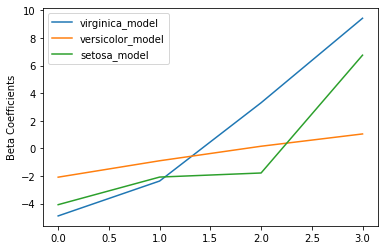

In [15]:
for lrModel, label in zip([lrModel_Virginica, lrModel_Versicolor, lrModel_Setosa], ['virginica_model', "versicolor_model", "setosa_model"]):
    beta = np.sort(lrModel.coefficients)
    line, = plt.plot(beta, label=label)
    line.set_label(label)
plt.ylabel('Beta Coefficients')
plt.legend()
plt.show()

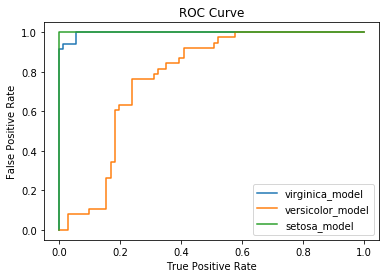

In [16]:
for lrModel, label in zip([lrModel_Virginica, lrModel_Versicolor, lrModel_Setosa], ['virginica_model', "versicolor_model", "setosa_model"]):
    trainingSummary = lrModel.summary
    roc = trainingSummary.roc.toPandas()
    plt.plot(roc['FPR'],roc['TPR'], label=label)
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

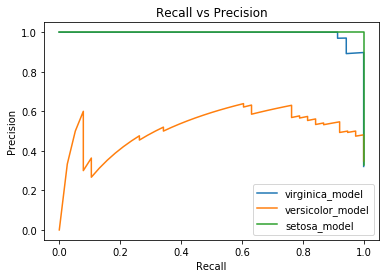

In [17]:
for lrModel, label in zip([lrModel_Virginica, lrModel_Versicolor, lrModel_Setosa], ['virginica_model', "versicolor_model", "setosa_model"]):
    trainingSummary = lrModel.summary
    pr = trainingSummary.pr.toPandas()
    plt.plot(pr['recall'],pr['precision'], label=label)
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.title('Recall vs Precision')
plt.legend()
plt.show()